<a href="https://colab.research.google.com/github/KBU8/DI-Bootcamp/blob/main/KB_Hakathon_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content the DataSet
Columns 👍
Age: age of primary beneficiary 🤝
Sex: insurance contractor gender, female, male 🤝
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 🤝
Children: Number of children covered by health insurance / Number of dependents 🤝
Smoker: Smoking 🤝
Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. 🤝
Charges: Individual medical costs billed by health insurance 🤝🤝🤝
Mission 🙄🙄
Can you accurately predict insurance costs? 🙄🙄🙄

Work plan ❤️
Analyze and explore data 🤝
Building a Machine Learning Mode

1- Analyze and Explore DataSet 😃

In [112]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
import plotly.express as px

In [113]:
#Importing the dataset
df =pd.read_csv("/content/insurance.csv")


# look the data set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# looking the shape DataSet
df.shape

(1338, 7)

In [19]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
#checking null value
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No any missing value

In [21]:
# look  describe data set
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


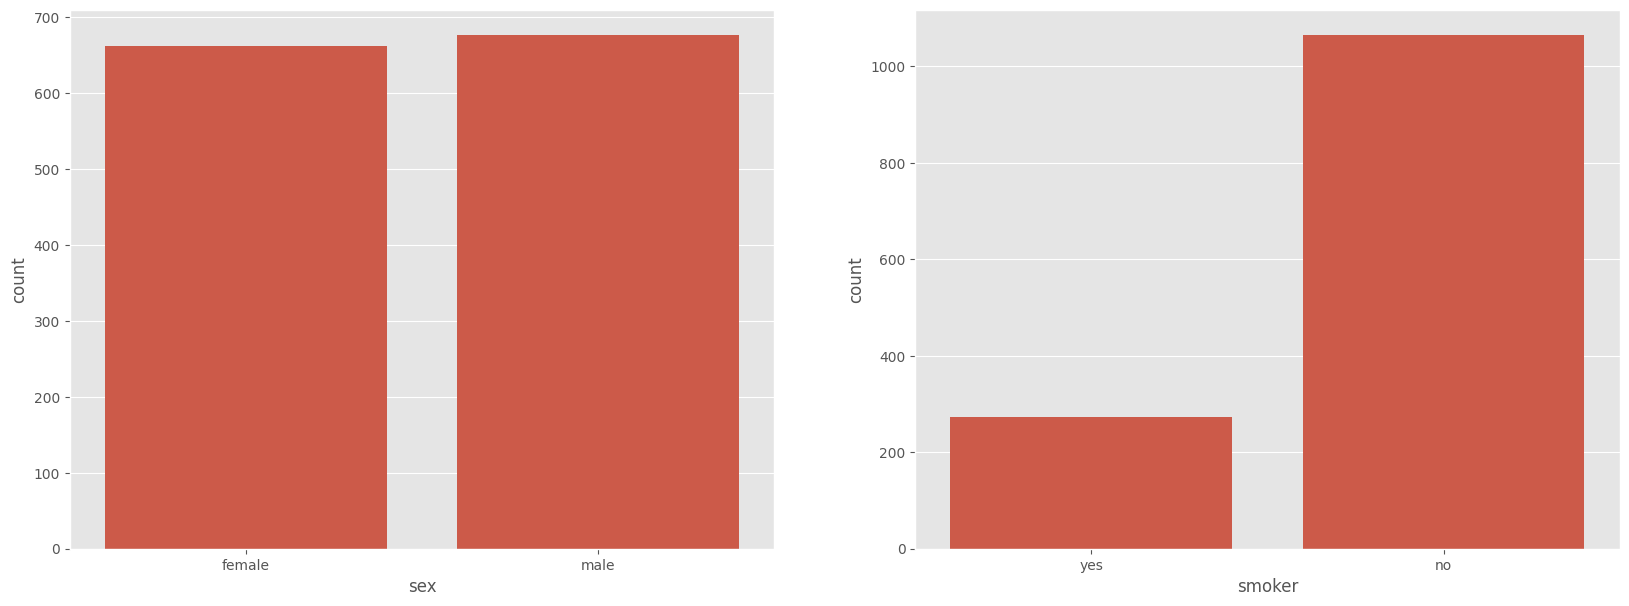

In [22]:
# how much repeat the gender and smoker in the dataset


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(x='sex',data=df,ax=ax[0])
sns.countplot(x='smoker',data=df,ax=ax[1])

plt.show()

Gender
Male 0.505232
Female 0.494768
Smoker
No 0.795217
yes 0.204783

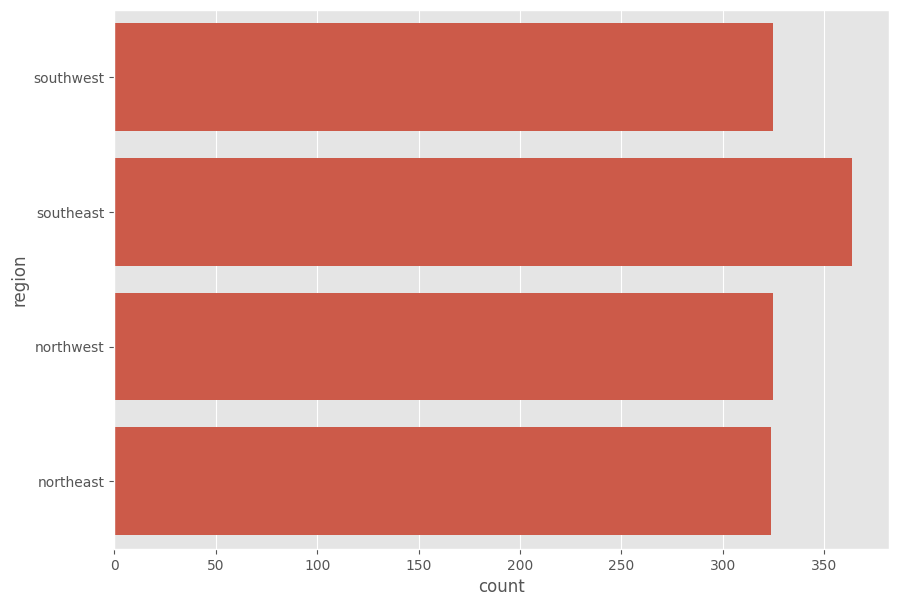

In [50]:
# how much repeat the region  in the dataset

plt.figure(figsize=(10,7))
sns.countplot(df["region"])
plt.show()

Region
southeast 0.272048
southwest 0.242900
northwest 0.242900
northeast 0.242152

Some Visualisation 😃😃

In [51]:
#interactive graph

px.scatter(df,x="age",y="charges",color="sex",animation_frame="smoker",size="children")

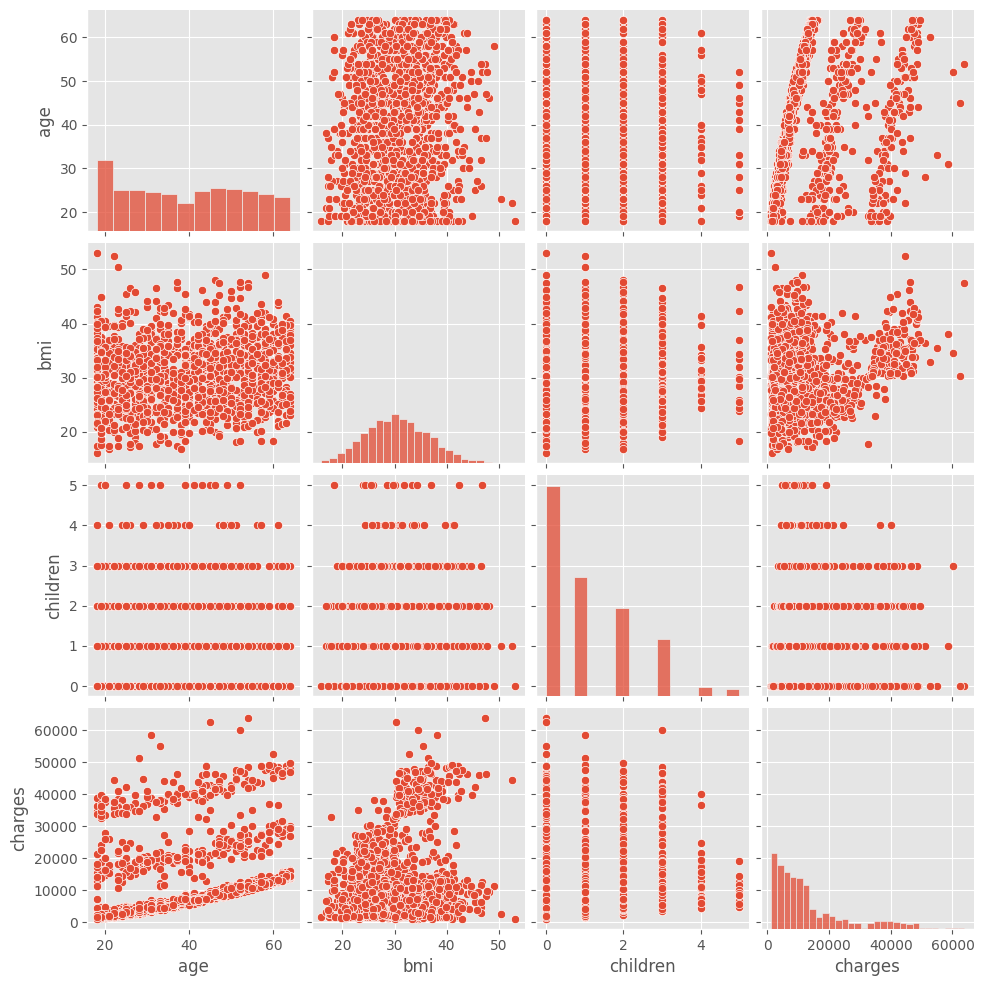

In [25]:
sns.pairplot(df)

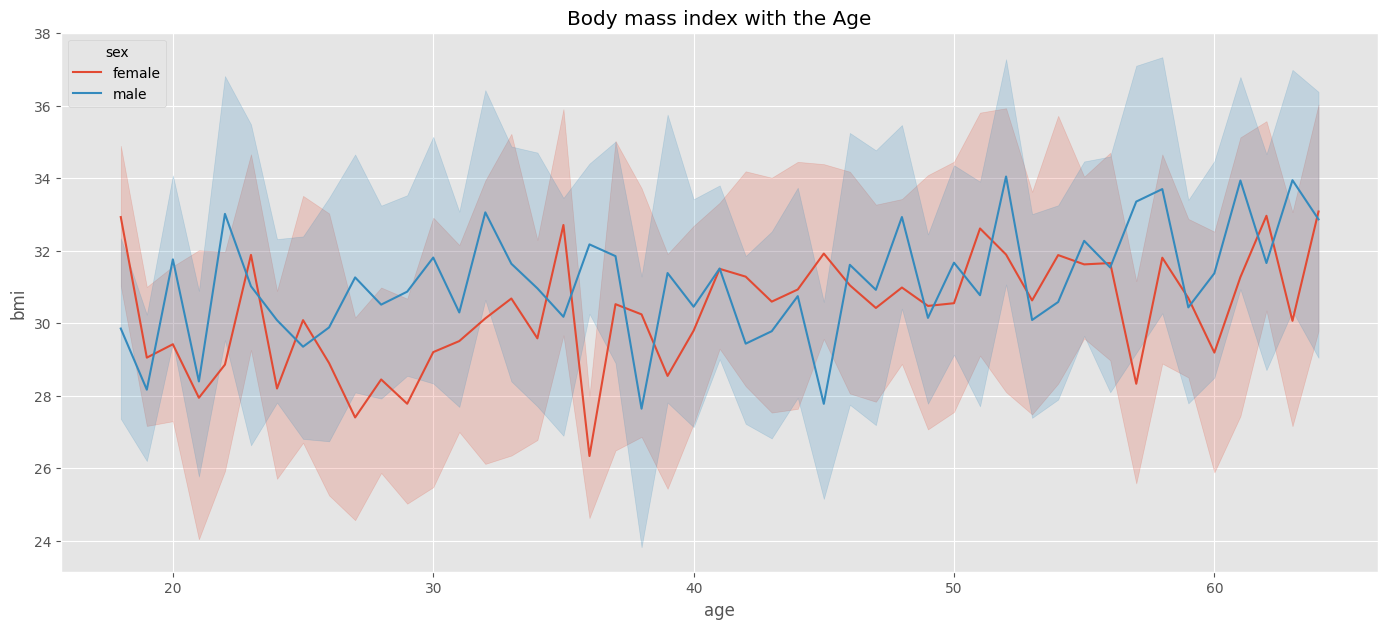

In [26]:
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.title("Body mass index with the Age")
plt.show()

we see the values Body mass in the Male higher than the female

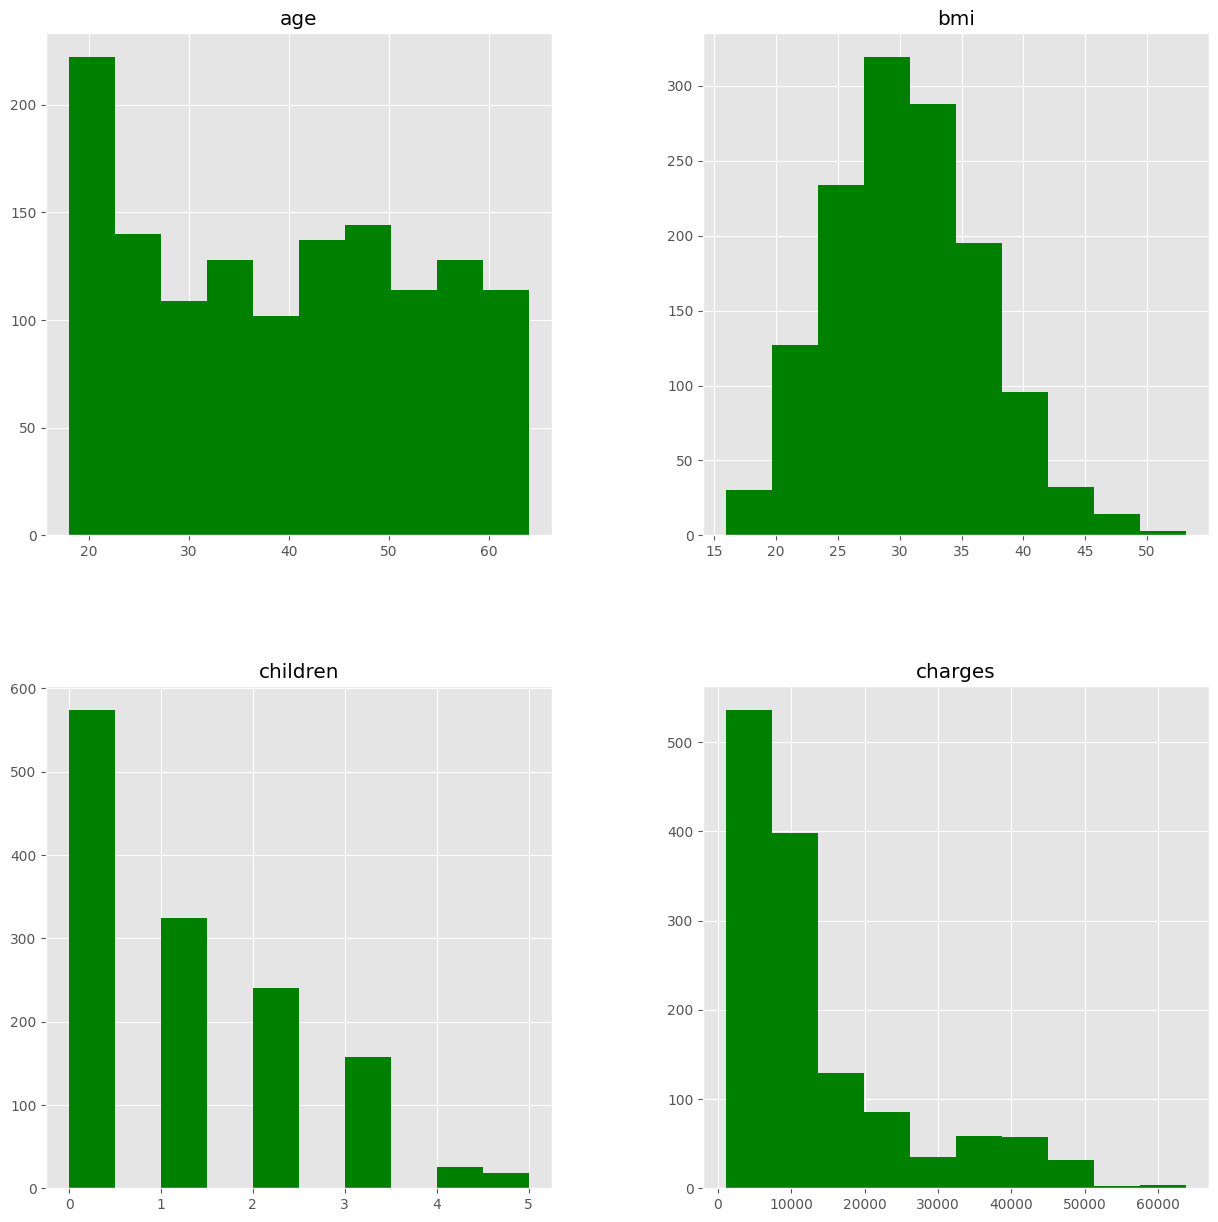

In [52]:
# Data Visualization with histogram
df[['age',  'bmi', 'children', 'charges']].hist(bins=10, figsize=(15,15),color='green')
plt.show()

In [53]:
# group by

reg=df.groupby("region")["charges"].mean().round(2)
reg

,charges
region,
northeast,13406.38
northwest,12417.58
southeast,14735.41
southwest,12346.94


<Axes: xlabel='region'>

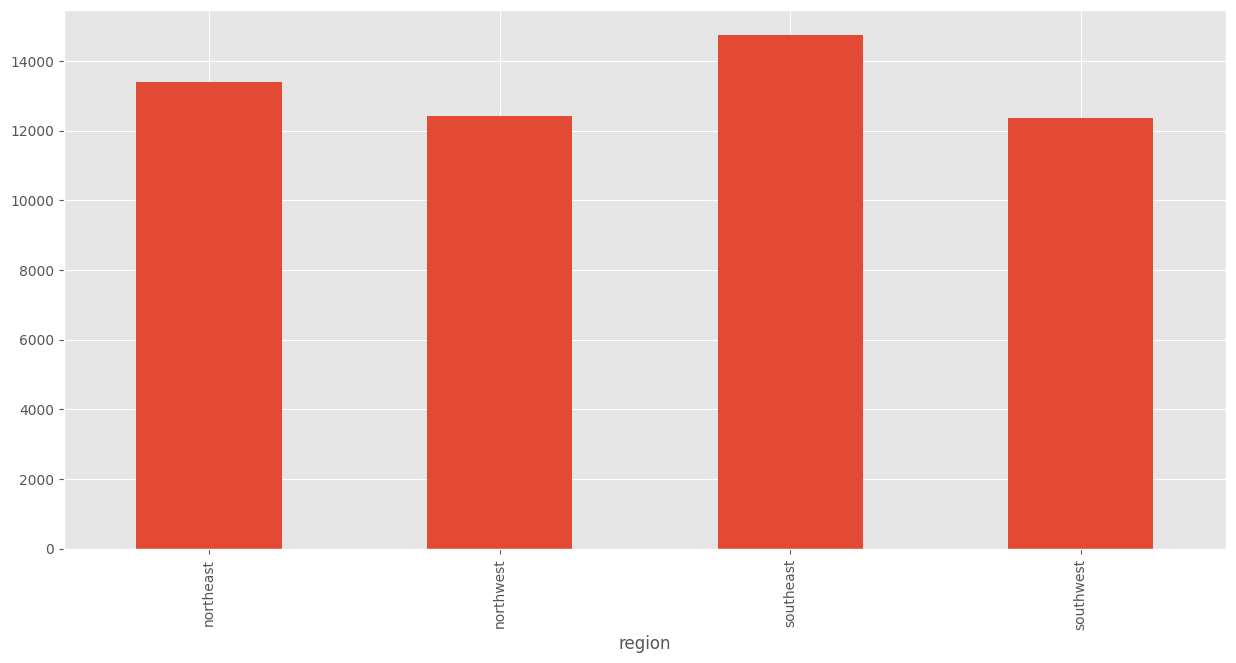

In [54]:
# Visualisation group by

reg.plot(kind="bar", figsize=(15,7))

In [55]:
# let making group by
a=df.groupby(["sex","smoker","region"])["charges"].mean().round(2)
a

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8320.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: charges, dtype: float64

<Axes: xlabel='sex,smoker,region'>

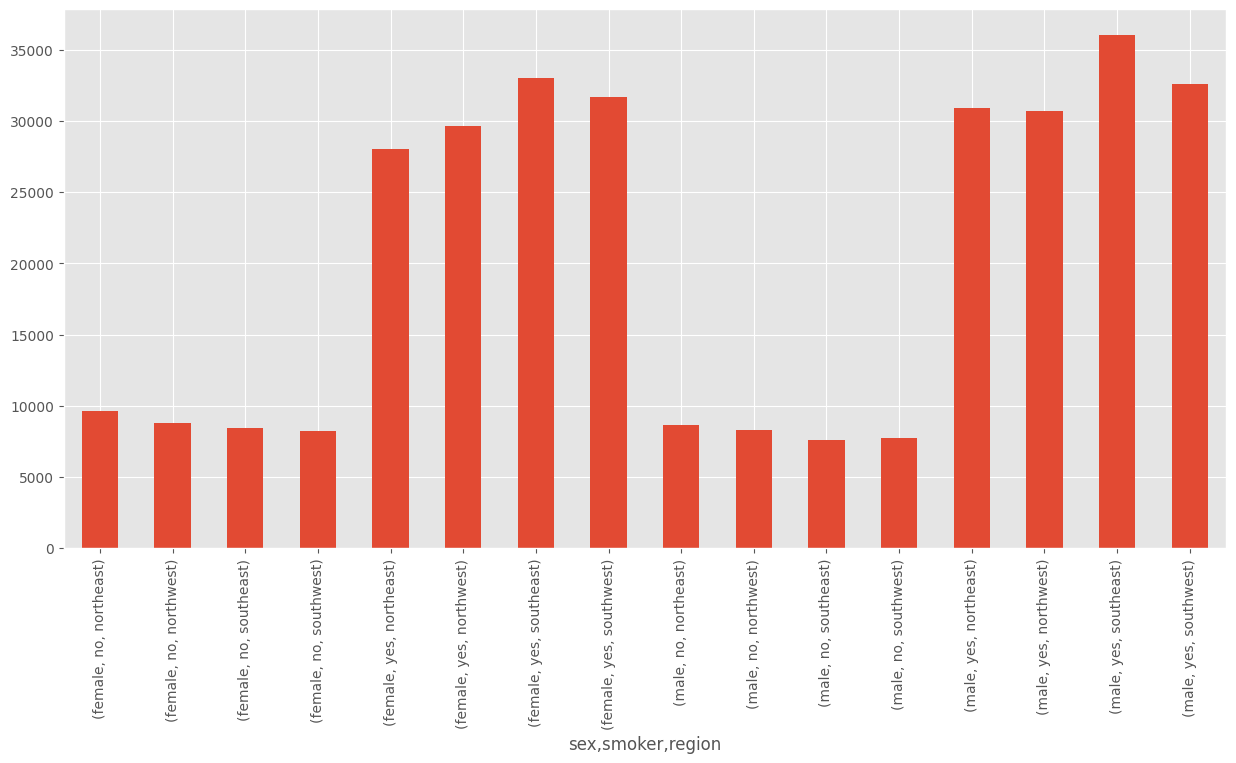

In [56]:
# Visualisation group by

a.plot(kind="bar", figsize=(15,7))

In [57]:
smo=df.groupby("smoker")["charges"].mean().round(2)
smo

,charges
smoker,
no,8434.27
yes,32050.23


In [58]:
gen=df.groupby("sex")["charges"].mean().round(2)
gen

,charges
sex,
female,12569.58
male,13956.75


<Axes: xlabel='sex'>

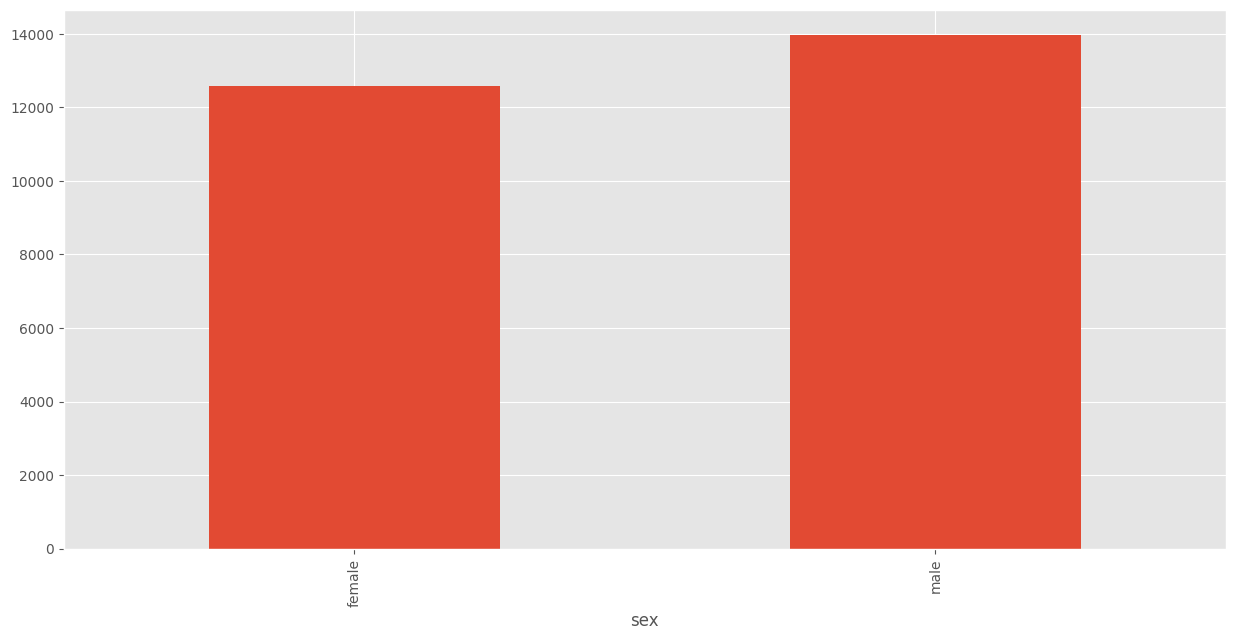

In [59]:
# Visualisation group by

gen.plot(kind="bar", figsize=(15,7))

Analysis Results😃😃😃
We have data about an Insurance and we want to know the highest Charges while analyzing this data through , We have data about an Insurance data and we want to know the highest Charges while analyzing this data through [ Children, Smoker, Region, Charges ]

The higher the age, the higher the insurance value . ❤️❤️

A non-smoker has less insurance than a smoker.❤️❤️

The amount of insurance according to gender is similar. ❤️❤️

The value of the insurance according to the region is also similar .❤️❤️

Building a Machine Learning Model - Regression 🙄🙄🙄

In [114]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [115]:
# look the data set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [116]:
# Convert categories to numbers

df["Gender"]=pd.get_dummies(df["sex"],drop_first=True)
df["Smoker"]=pd.get_dummies(df["smoker"],drop_first=True)

In [117]:
LE=LabelEncoder()
LE.fit(df["region"])
df["Region"]=LE.transform(df["region"])

In [118]:
# drop the columns I don't need

df.drop(columns=["sex","smoker","region"],inplace=True)
df.head()

,age,bmi,children,charges,Gender,Smoker,Region
0,19,27.900,0,16884.92400,False,True,3
1,18,33.770,1,1725.55230,True,False,2
2,28,33.000,3,4449.46200,True,False,2
3,33,22.705,0,21984.47061,True,False,1
4,32,28.880,0,3866.85520,True,False,1


In [120]:
#Defined X value and y value , and split the data train

X = df.drop(columns="charges")
y = df["charges"]    # y = quality

In [121]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1003, 6)
X Test  :  (335, 6)
Y Train :  (1003,)
Y Test  :  (335,)


In [122]:
# using the model Linear Regression

LinearRegression_model=LinearRegression(fit_intercept=True,normalize=False,copy_X=True, n_jobs=None)

# fit model

LinearRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LinearRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR))

print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR))


TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'